Mestrado em Modelagem Matematica da Informacao
----------------------------------------------
Disciplina: Modelagem e Mineracao de Dados
------------------------------------------

Master Program - Mathematical Modeling of Information
-----------------------------------------------------
Course: Data Mining and Modeling
--------------------------------

Professor: Renato Rocha Souza
-----------------------------  

Introduction to Data Mining  
--------------------------------------------
Comparing Weka and Python for the same tasks  
http://www.reddit.com/r/MachineLearning/comments/1rwj8p/why_are_python_r_so_much_more_popular_here_than/
____________________________________________

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import scipy.stats as ss
from scipy.io.arff import loadarff
import os

#pylab inline
%matplotlib inline
#%matplotlib notebook

In [2]:
datapath = "../datasets/"
outputs = "../outputs/"

In [3]:
dataset1 = "bank.arff"
dataset2 = "zoo.arff"
dataset3 = "weather.nominal.arff"
dataset4 = "vote.arff"

#### Explorando os dados: Bank.arff

In [4]:
bank = loadarff(os.path.join(datapath,dataset1))
df_bank = pd.DataFrame(bank[0])

In [5]:
df_bank.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48.0,b'FEMALE',b'INNER_CITY',17546.0,b'NO',b'1',b'NO',b'NO',b'NO',b'NO',b'YES'
1,40.0,b'MALE',b'TOWN',30085.1,b'YES',b'3',b'YES',b'NO',b'YES',b'YES',b'NO'
2,51.0,b'FEMALE',b'INNER_CITY',16575.4,b'YES',b'0',b'YES',b'YES',b'YES',b'NO',b'NO'
3,23.0,b'FEMALE',b'TOWN',20375.4,b'YES',b'3',b'NO',b'NO',b'YES',b'NO',b'NO'
4,57.0,b'FEMALE',b'RURAL',50576.3,b'YES',b'0',b'NO',b'YES',b'NO',b'NO',b'NO'


In [6]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
age            600 non-null float64
sex            600 non-null object
region         600 non-null object
income         600 non-null float64
married        600 non-null object
children       600 non-null object
car            600 non-null object
save_act       600 non-null object
current_act    600 non-null object
mortgage       600 non-null object
pep            600 non-null object
dtypes: float64(2), object(9)
memory usage: 51.6+ KB


In [7]:
df_bank.columns

Index(['age', 'sex', 'region', 'income', 'married', 'children', 'car',
       'save_act', 'current_act', 'mortgage', 'pep'],
      dtype='object')

In [8]:
features = set(df_bank.columns)
features -= set(['age','income']) # retiro os valores numéricos
features

{'car',
 'children',
 'current_act',
 'married',
 'mortgage',
 'pep',
 'region',
 'save_act',
 'sex'}

In [9]:
for feature in features:
    print(u'Feature {} possui os valores únicos: {}'.format(feature, df_bank[feature].unique()))

Feature married possui os valores únicos: [b'NO' b'YES']
Feature car possui os valores únicos: [b'NO' b'YES']
Feature save_act possui os valores únicos: [b'NO' b'YES']
Feature mortgage possui os valores únicos: [b'NO' b'YES']
Feature sex possui os valores únicos: [b'FEMALE' b'MALE']
Feature children possui os valores únicos: [b'1' b'3' b'0' b'2']
Feature region possui os valores únicos: [b'INNER_CITY' b'TOWN' b'RURAL' b'SUBURBAN']
Feature pep possui os valores únicos: [b'YES' b'NO']
Feature current_act possui os valores únicos: [b'NO' b'YES']


#### Discretizando os dados

http://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas

In [10]:
df_bank2 = df_bank.copy()

df_bank2.children = df_bank.children.map(int)
df_bank2.age = df_bank.age.map(int)

dict_convert_true_false = {b'YES': 1, b'NO': 0}
df_bank2['married'] = df_bank['married'].map(dict_convert_true_false)
df_bank2['save_act'] = df_bank['save_act'].map(dict_convert_true_false)
df_bank2['current_act'] = df_bank['current_act'].map(dict_convert_true_false)
df_bank2['mortgage'] = df_bank['mortgage'].map(dict_convert_true_false)
df_bank2['pep'] = df_bank['pep'].map(dict_convert_true_false)
df_bank2['car'] = df_bank['car'].map(dict_convert_true_false)

dict_convert_gender = {b'FEMALE':1, b'MALE':0}
df_bank2['sex'] = df_bank['sex'].map(dict_convert_gender)

dict_convert_region = {b'INNER_CITY':0, b'TOWN':1, b'SUBURBAN':2, b'RURAL':3}
df_bank2['region'] = df_bank['region'].map(dict_convert_region)

In [11]:
df_bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
age            600 non-null int64
sex            600 non-null int64
region         600 non-null int64
income         600 non-null float64
married        600 non-null int64
children       600 non-null int64
car            600 non-null int64
save_act       600 non-null int64
current_act    600 non-null int64
mortgage       600 non-null int64
pep            600 non-null int64
dtypes: float64(1), int64(10)
memory usage: 51.6 KB


In [12]:
df_bank2.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,1,0,17546.0,0,1,0,0,0,0,1
1,40,0,1,30085.1,1,3,1,0,1,1,0
2,51,1,0,16575.4,1,0,1,1,1,0,0
3,23,1,1,20375.4,1,3,0,0,1,0,0
4,57,1,3,50576.3,1,0,0,1,0,0,0


In [13]:
byPEP = df_bank2.groupby(['pep'])
byPEP.describe()

age         car    children  current_act        income  \
pep                                                                        
0   count  326.000000  326.000000  326.000000   326.000000    326.000000   
    mean    40.098160    0.484663    1.067485     0.748466  24900.953374   
    std     14.123506    0.500533    1.195524     0.434562  11661.123422   
    min     18.000000    0.000000    0.000000     0.000000   5014.210000   
    25%     27.000000    0.000000    0.000000     0.250000  15366.475000   
    50%     40.000000    0.000000    0.000000     1.000000  23105.000000   
    75%     51.000000    1.000000    2.000000     1.000000  31210.900000   
    max     67.000000    1.000000    3.000000     1.000000  61554.600000   
1   count  274.000000  274.000000  274.000000   274.000000    274.000000   
    mean    45.127737    0.503650    0.945255     0.770073  30644.919453   
    std     14.327991    0.500902    0.860571     0.421556  13609.613043   
    min     18.000000    0.000000    0.000000     0.000000   7756.360000   
    25%     34.000000    0.000000    0.000000     1.000000  19639.475000   
    50%     45.000000    1.000000    1.000000     1.000000  28080.050000   
    75%     58.000000    1.000000    1.000000     1.000000  38458.350000   
    max     67.000000    1.000000    3.000000     1.000000  63130.100000   

              married    mortgage      region    save_act         sex  
pep                                                                    
0   count  326.000000  326.000000  326.000000  326.000000  326.000000  
    mean     0.742331    0.358896    0.944785    0.720859    0.521472  
    std      0.438023    0.480414    1.071313    0.449267    0.500307  
    min      0.000000    0.000000    0.000000    0.000000    0.000000  
    25%      0.000000    0.000000    0.000000    0.000000    0.000000  
    50%      1.000000    0.000000    1.000000    1.000000    1.000000  
    75%      1.000000    1.000000    1.000000    1.000000    1.000000  
    max      1.000000    1.000000    3.000000    1.000000    1.000000  
1   count  274.000000  274.000000  274.000000  274.000000  274.000000  
    mean     0.562044    0.335766    1.010949    0.653285    0.474453  
    std      0.497043    0.473122    1.117571    0.476795    0.500261  
    min      0.000000    0.000000    0.000000    0.000000    0.000000  
    25%      0.000000    0.000000    0.000000    0.000000    0.000000  
    50%      1.000000    0.000000    1.000000    1.000000    0.000000  
    75%      1.000000    1.000000    2.000000    1.000000    1.000000  
    max      1.000000    1.000000    3.000000    1.000000    1.000000

In [14]:
df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == 0)].describe()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
count,156.00000,156.0,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.0
mean,39.00641,0.0,0.974359,24292.705449,0.737179,1.083333,0.474359,0.724359,0.743590,0.397436,0.0
std,13.59103,0.0,1.095143,11756.606525,0.441583,1.180259,0.500950,0.448276,0.438057,0.490944,0.0
min,18.00000,0.0,0.000000,5014.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,26.00000,0.0,0.000000,14601.425000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,39.00000,0.0,1.000000,22172.400000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0
75%,48.00000,0.0,1.250000,31959.950000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.0
max,67.00000,0.0,3.000000,57671.700000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.0


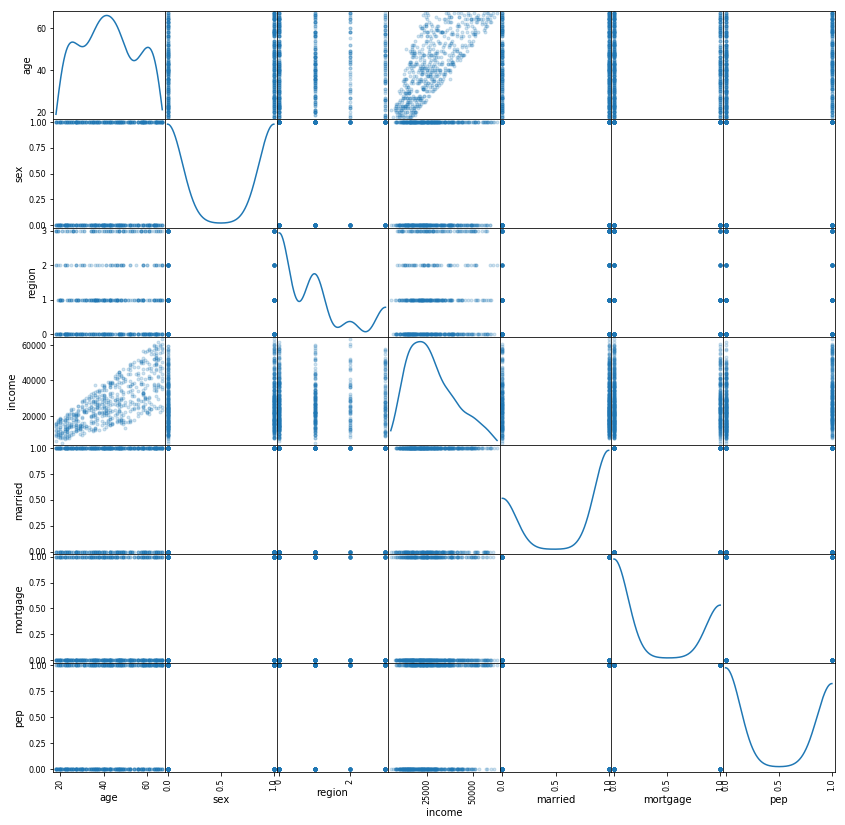

In [15]:
from pandas.tools.plotting import scatter_matrix
#fig = scatter_matrix(df_bank2, alpha=0.2, figsize=(14, 14), diagonal='kde')
my_features = ['age', 'sex', 'region', 'income', 'married', 'mortgage', 'pep']
fig = scatter_matrix(df_bank2[my_features], alpha=0.2, figsize=(14, 14), diagonal='kde')

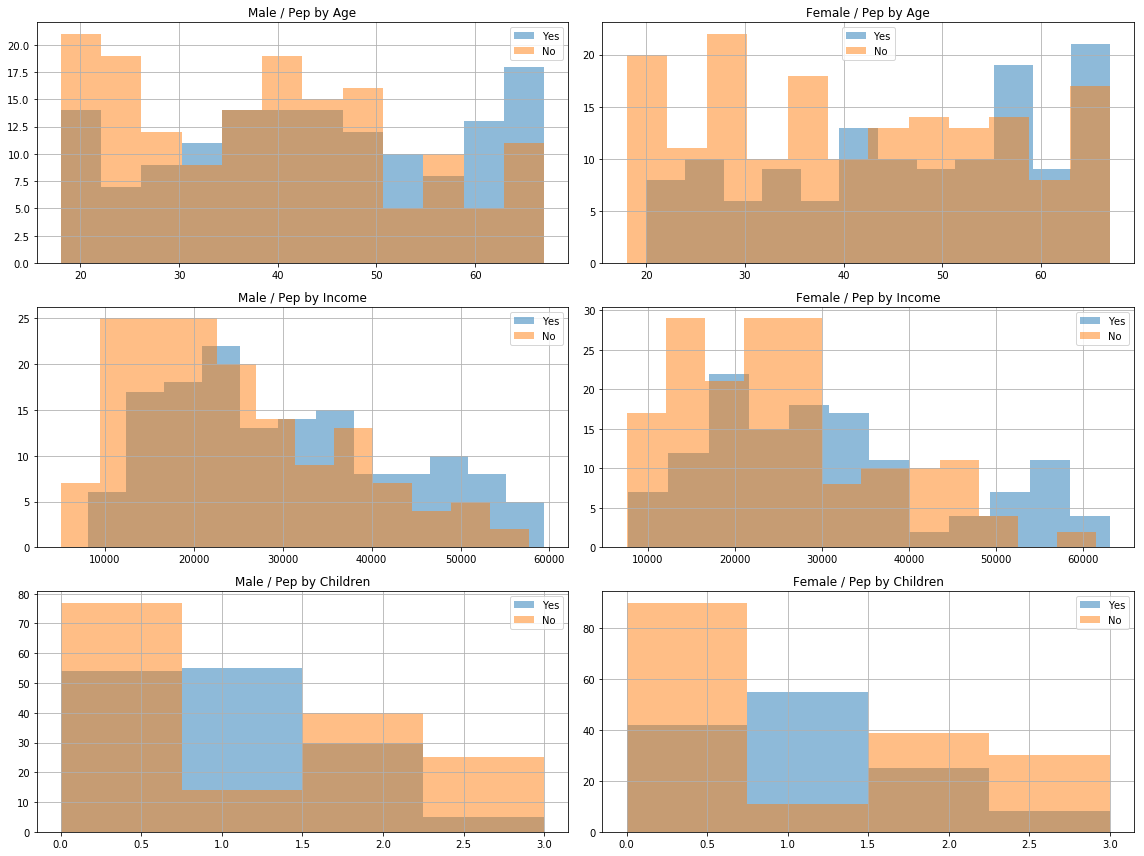

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,12))

df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == 1)]['age'].hist(ax=axes[0,0], bins=12, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == 0)]['age'].hist(ax=axes[0,0], bins=12, alpha=0.5, label='No')
axes[0,0].set_title('Male / Pep by Age')
axes[0,0].legend()

df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == 1)]['age'].hist(ax=axes[0,1], bins=12, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == 0)]['age'].hist(ax=axes[0,1], bins=12, alpha=0.5, label='No')
axes[0,1].set_title('Female / Pep by Age')
axes[0,1].legend()

df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == 1)]['income'].hist(ax=axes[1,0], bins=12, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == 0)]['income'].hist(ax=axes[1,0], bins=12, alpha=0.5, label='No')
axes[1,0].set_title('Male / Pep by Income')
axes[1,0].legend()

df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == 1)]['income'].hist(ax=axes[1,1], bins=12, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == 0)]['income'].hist(ax=axes[1,1], bins=12, alpha=0.5, label='No')
axes[1,1].set_title('Female / Pep by Income')
axes[1,1].legend()

df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == 1)]['children'].hist(ax=axes[2,0], bins=4, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == 0)]['children'].hist(ax=axes[2,0], bins=4, alpha=0.5, label='No')
axes[2,0].set_title('Male / Pep by Children')
axes[2,0].legend()

df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == 1)]['children'].hist(ax=axes[2,1], bins=4, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == 0)]['children'].hist(ax=axes[2,1], bins=4, alpha=0.5, label='No')
axes[2,1].set_title('Female / Pep by Children')
axes[2,1].legend()

fig.tight_layout()

#### Construindo uma árvore de decisão:

http://scikit-learn.org/stable/modules/tree.html  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier  
http://stackoverflow.com/questions/18753709/how-to-make-sense-the-output-of-decisiontreeclassifier-in-scikit-learn  
http://stackoverflow.com/questions/23557545/how-to-explain-the-decision-tree-from-scikit-learn  
https://github.com/paulgb/sklearn-pandas  

In [17]:
#Install http://www.graphviz.org/ & 
#Instal https://pypi.python.org/pypi/pydotplus

#http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image #needed to render in notebook
import pydotplus

In [18]:
#clf = tree.DecisionTreeClassifier(criterion='entropy', max_features="auto", min_samples_leaf=10)
clf = tree.DecisionTreeClassifier(criterion='gini', max_features=None, min_samples_leaf=10)
features_list=['age', 'sex', 'region', 'income', 'married', 'children', 'car', 'save_act', 'current_act', 'mortgage']
clf.fit(df_bank2[features_list], df_bank2.pep)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [19]:
print(clf.n_features_)
print(clf.feature_importances_)

10
[ 0.02788673  0.          0.01016284  0.32780887  0.10364701  0.27096397
  0.          0.11550949  0.00757892  0.13644217]


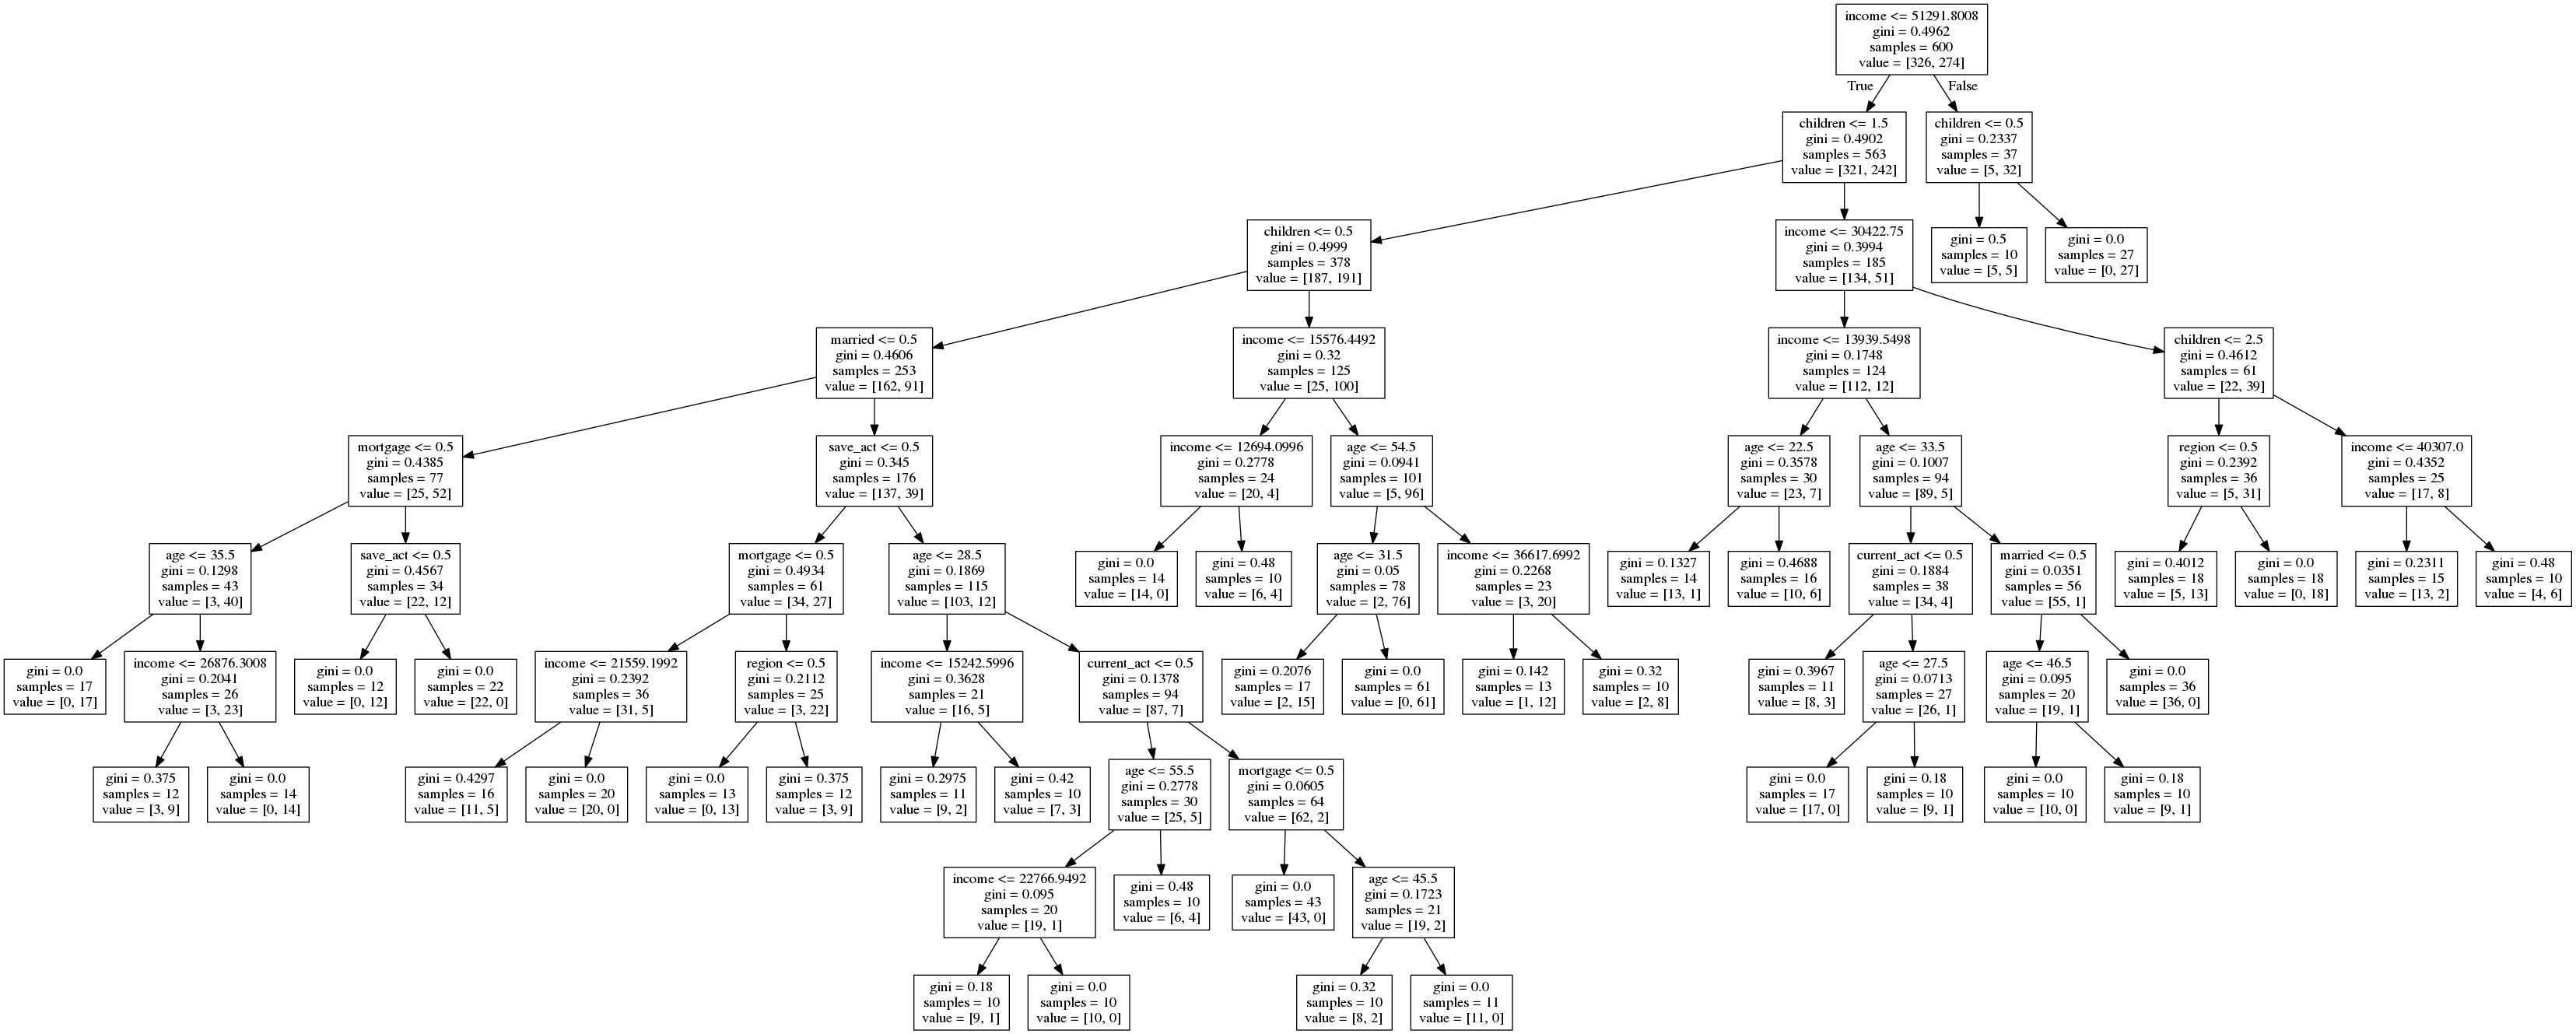

In [20]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features_list) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

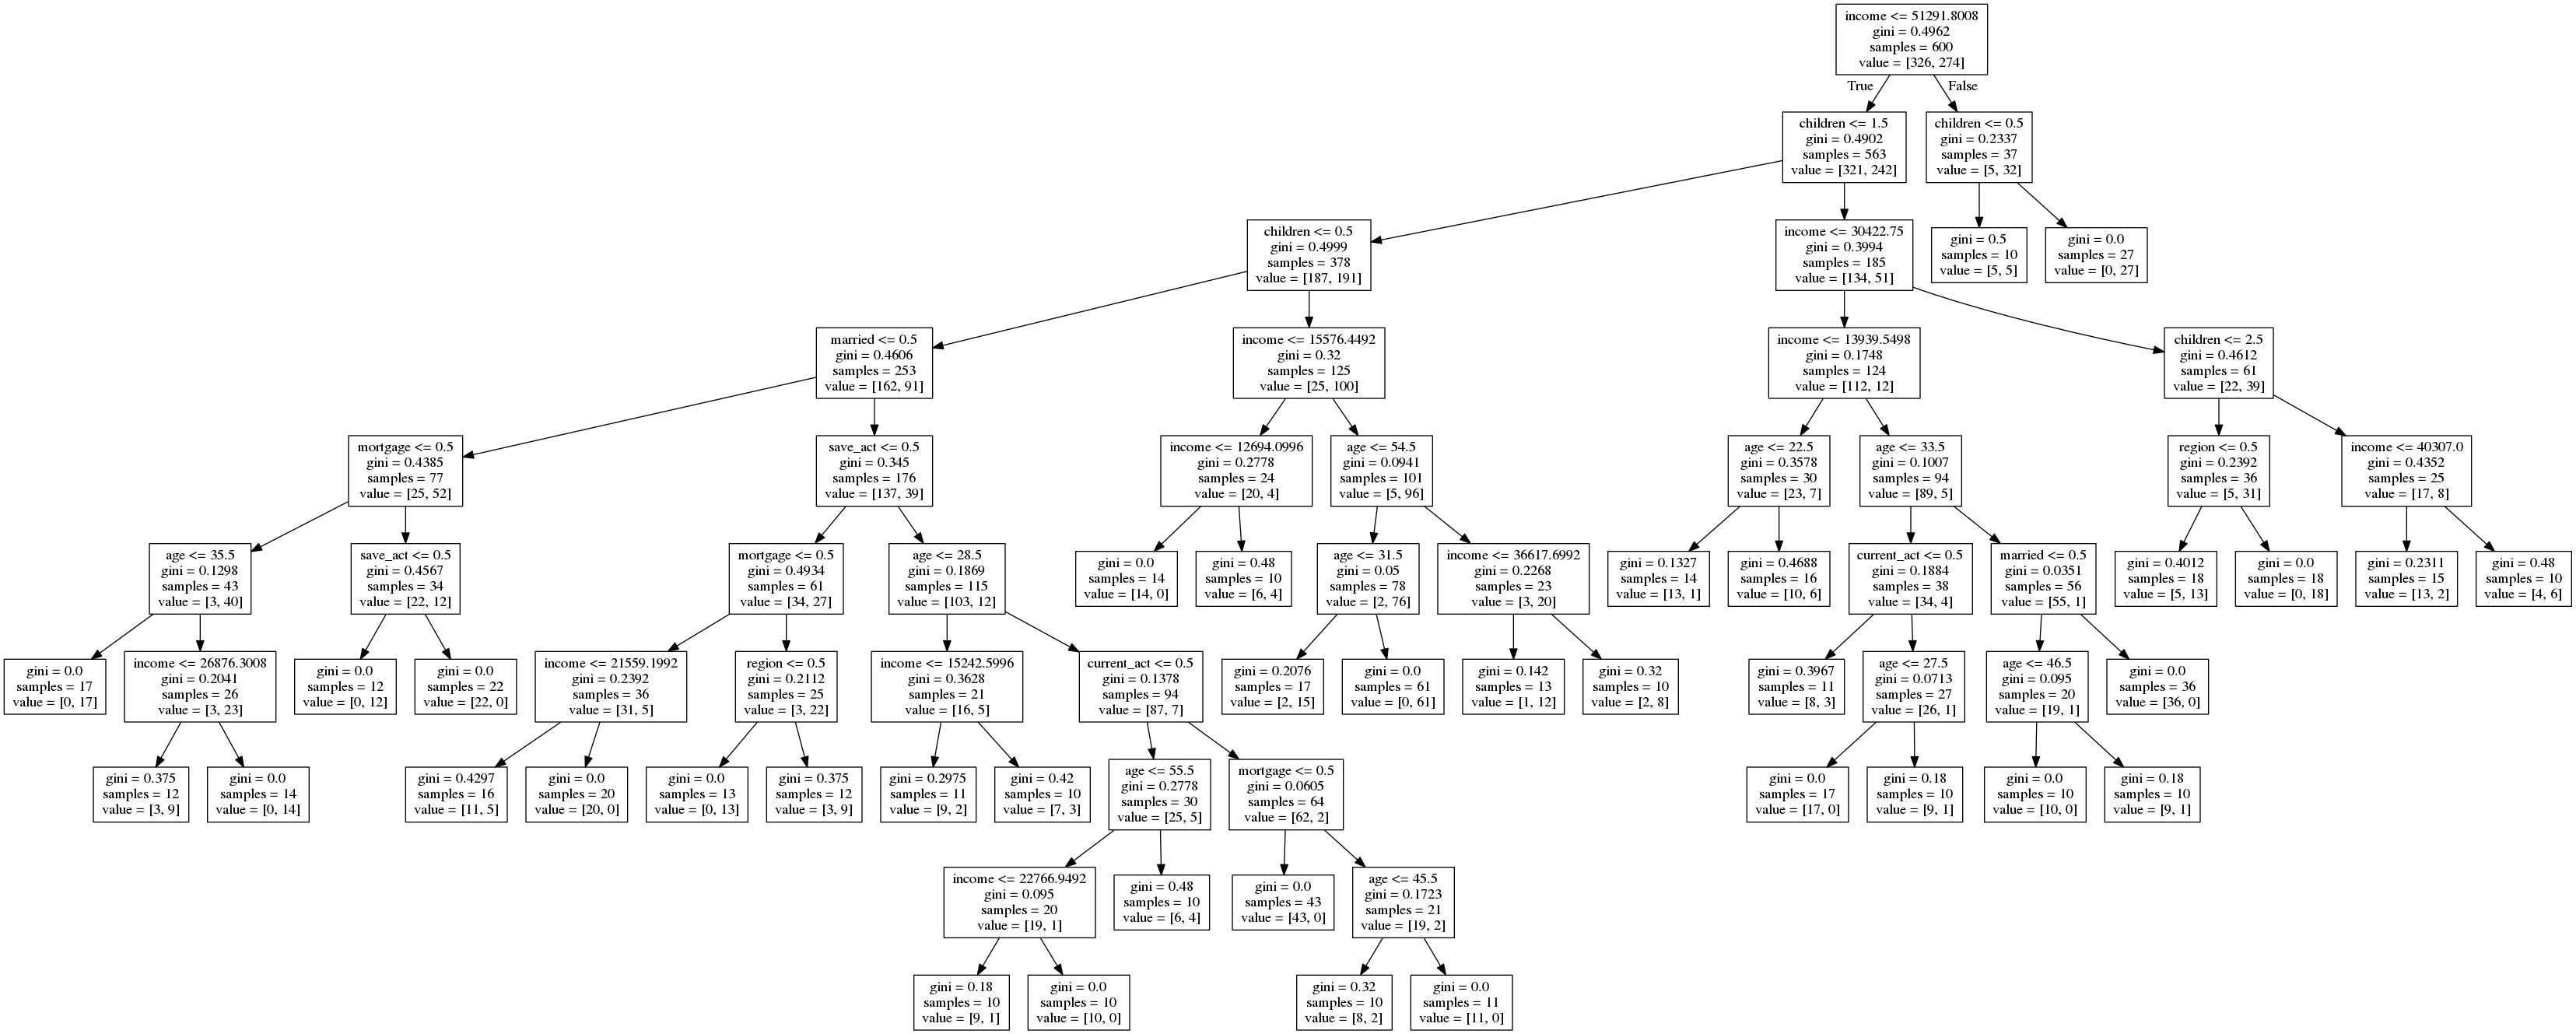

In [21]:
#Saving the generated tree to a figure
with open("bank_pep.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, feature_names=features_list)
    
#Calling an external program with the operator "!"
!dot -Tpng bank_pep.dot -o bank_pep.png
Image("bank_pep.png")

A partir de nossa árvore treinada, podemos classificar novos elementos:

In [22]:
#df_bank2[features_list][0:5]
df_bank2[0:5]

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,1,0,17546.0,0,1,0,0,0,0,1
1,40,0,1,30085.1,1,3,1,0,1,1,0
2,51,1,0,16575.4,1,0,1,1,1,0,0
3,23,1,1,20375.4,1,3,0,0,1,0,0
4,57,1,3,50576.3,1,0,0,1,0,0,0


In [23]:
#clf.predict(df_bank2[features_list].ix[1])
new_data = np.array([40,0,1,30085.0,1,3,1,0,1,1]).reshape(1,-1)
clf.predict(new_data)

array([0])

#### Visualizando a superfície de decisão

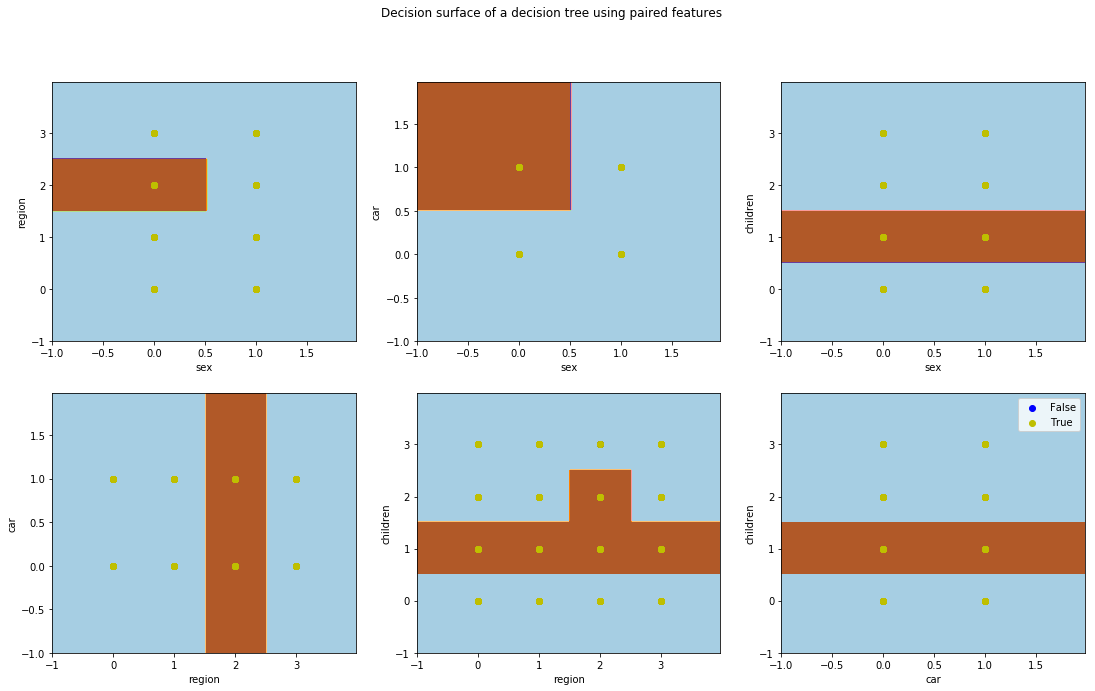

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 2
plot_colors = "by"
plot_step = 0.02
outcome = ['False','True']

for pairidx, pair in enumerate([['sex','region'], ['sex', 'car'], ['sex', 'children'],
                                ['region', 'car'], ['region', 'children'], ['car', 'children']]):
    # We only take the two corresponding features
    X = df_bank2[pair].values
    y = df_bank2.pep

    # Shuffle
    #idx = np.arange(X.shape[0])
    #np.random.seed(13)
    #np.random.shuffle(idx)
    #X = X[idx]
    #y = y[idx]

    # Standardize
    #mean = X.mean(axis=0)
    #std = X.std(axis=0)
    #X = (X - mean) / std

    # Train
    clf2 = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[:, 0], X[:, 1], c=color, label=outcome[i], cmap=plt.cm.Paired)
    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.legend()
plt.show()

#### Aplicando K-Means

Seguindo o exemplo: http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html  

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D

In [26]:
centers = [[1, 1], [-1, -1], [1, -1]]

X = df_bank2[['age','income','region']].values

estimators = {'k_means_3': KMeans(n_clusters=3),
              'k_means_8': KMeans(n_clusters=8),
              'k_means_bad_init': KMeans(n_clusters=3, n_init=1, init='random')}

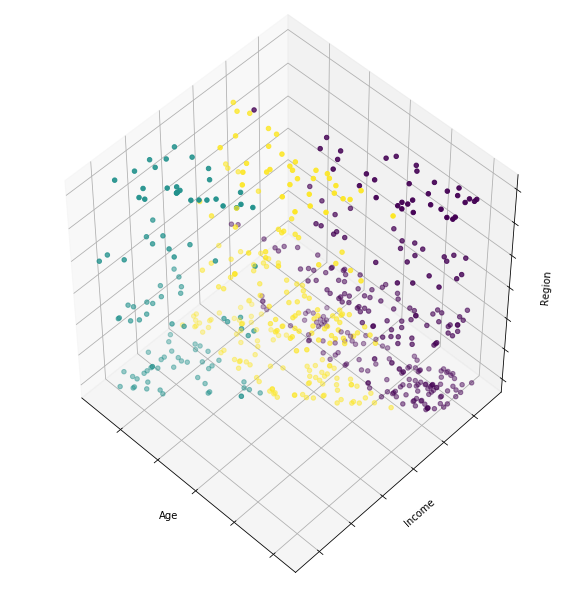

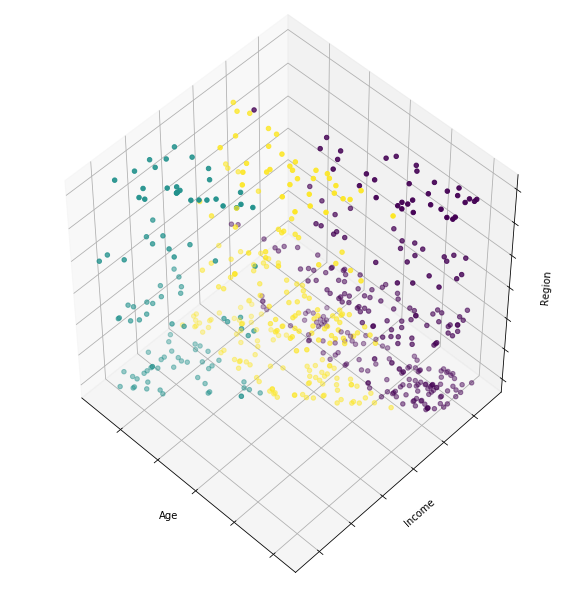

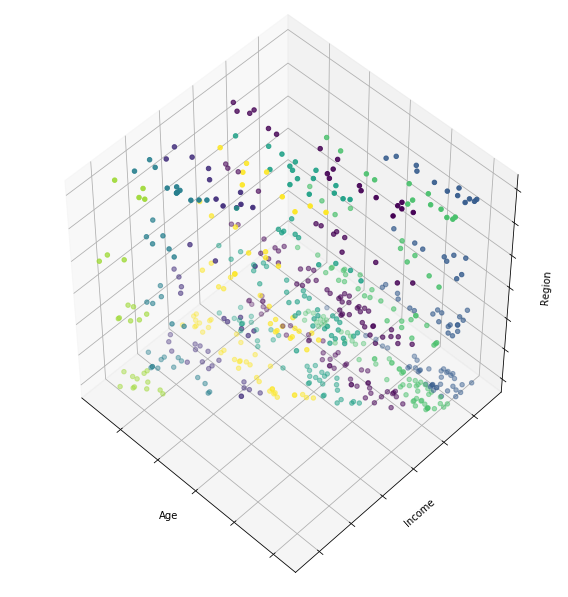

In [27]:
fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(8,8))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(np.float))
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Age')
    ax.set_ylabel('Income')
    ax.set_zlabel('Region')
    ax.set_label(name)
    fignum = fignum + 1

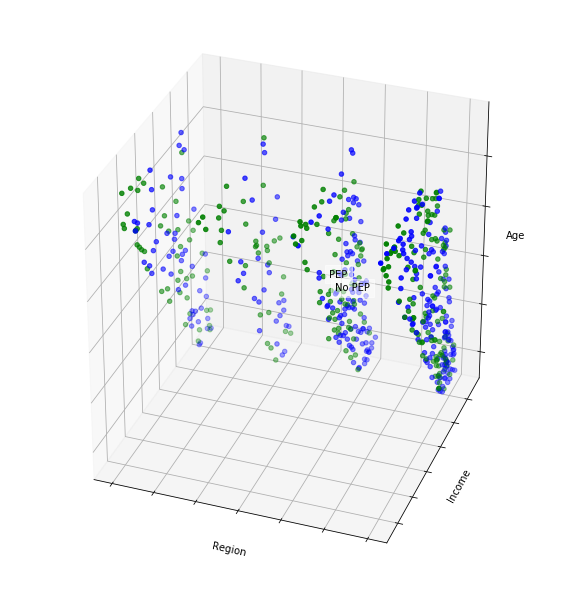

In [28]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(8, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=110)

plt.cla()

X = df_bank2[['age','income','region']].values
y = df_bank2.pep

for name, label in [('PEP', 1),('No PEP', 0)]:
    ax.text3D(X[y == label, 2].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 0].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, ['b','g'])
ax.scatter(X[:, 2], X[:, 1], X[:, 0], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Region')
ax.set_ylabel('Income')
ax.set_zlabel('Age')
plt.show()

In [29]:
# Adapting the exemple: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html  
from time import time
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [30]:
df_bank2.head(1)

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,1,0,17546.0,0,1,0,0,0,0,1


In [31]:
np.random.seed(42)
data = scale(df_bank2[features_list])
labels = df_bank2.pep.values
n_samples, n_features = data.shape
n_targets = len(np.unique(labels))
print(data.shape)
print(labels.shape)

(600, 10)
(600,)


n_targets: 2, 	 n_samples 600, 	 n_features 10
_______________________________________________________________________________
init    time  inertia    homo   compl  v-meas     ARI AMI  silhouette
k-means++   0.02s    5204   0.010   0.010   0.010   0.014   0.009    0.117
   random   0.03s    5204   0.010   0.010   0.010   0.014   0.009    0.120
PCA-based   0.00s    5204   0.011   0.011   0.011   0.014   0.010    0.123
_______________________________________________________________________________


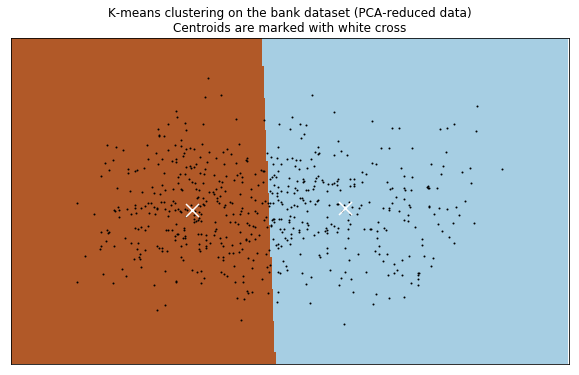

In [32]:
sample_size = 300

print("n_targets: %d, \t n_samples %d, \t n_features %d"
      % (n_targets, n_samples, n_features))

print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia    homo   compl  v-meas     ARI AMI  silhouette')

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_targets, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_targets, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_targets).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_targets, n_init=1),
              name="PCA-based",
              data=data)
print(79 * '_')

###############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_targets, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10,6))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the bank dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()